<a href="https://colab.research.google.com/github/Yogesh-sysbio/yp-practice/blob/main/dry_bean.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install ucimlrepo

In [ ]:
from ucimlrepo import fetch_ucirepo

# fetch dataset
dry_bean = fetch_ucirepo(id=602)

# data (as pandas dataframes)
X = dry_bean.data.features
y = dry_bean.data.targets

# metadata
print(dry_bean.metadata)

# variable information
print(dry_bean.variables)


{'uci_id': 602, 'name': 'Dry Bean', 'repository_url': 'https://archive.ics.uci.edu/dataset/602/dry+bean+dataset', 'data_url': 'https://archive.ics.uci.edu/static/public/602/data.csv', 'abstract': 'Images of 13,611 grains of 7 different registered dry beans were taken with a high-resolution camera. A total of 16 features; 12 dimensions and 4 shape forms, were obtained from the grains.', 'area': 'Biology', 'tasks': ['Classification'], 'characteristics': ['Multivariate'], 'num_instances': 13611, 'num_features': 16, 'feature_types': ['Integer', 'Real'], 'demographics': [], 'target_col': ['Class'], 'index_col': None, 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_of_dataset_creation': 2020, 'last_updated': 'Thu Mar 28 2024', 'dataset_doi': '10.24432/C50S4B', 'creators': [], 'intro_paper': {'ID': 244, 'type': 'NATIVE', 'title': 'Multiclass classification of dry beans using computer vision and machine learning techniques', 'authors': 'M. Koklu, Ilker Ali Özkan', 'venue': 'Co

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.impute import SimpleImputer  # Import the imputer

# Separate features (X) and target variable (y)
X = dry_bean.data.features
y = dry_bean.data.targets

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create an imputer to fill missing values (e.g., with the mean)
imputer = SimpleImputer(strategy='mean')  # You can use other strategies like 'median' or 'most_frequent'

# Fit the imputer on the training data and transform both training and testing data
X_train = imputer.fit_transform(X_train)
X_test = imputer.transform(X_test) # Use the same imputer fitted on training data to avoid data leakage.


# Create a logistic regression model
model = LogisticRegression()

# Train the model on the training data
model.fit(X_train, y_train)

# Make predictions on the testing data
y_pred = model.predict(X_test)

# Evaluate the model's performance
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Print the confusion matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", cm)
print(classification_report(y_test, y_pred))


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Accuracy: 0.6959236136614029
Confusion Matrix:
 [[123   0  98   0  38   0   2]
 [  0 116   1   0   0   0   0]
 [ 65   1 241   0   7   3   0]
 [  0   0   0 560  15  20  76]
 [ 19   0   4  12 286   3  84]
 [  4   0   0 102   9 222  76]
 [  0   0   0  32 108  49 347]]
              precision    recall  f1-score   support

    BARBUNYA       0.58      0.47      0.52       261
      BOMBAY       0.99      0.99      0.99       117
        CALI       0.70      0.76      0.73       317
    DERMASON       0.79      0.83      0.81       671
       HOROZ       0.62      0.70      0.66       408
       SEKER       0.75      0.54      0.63       413
        SIRA       0.59      0.65      0.62       536

    accuracy                           0.70      2723
   macro avg       0.72      0.71      0.71      2723
weighted avg       0.70      0.70      0.69      2723



/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
!pip install matplotlib seaborn
# Install matplotlib and seaborn for visualization if not already installed.
import matplotlib.pyplot as plt
import seaborn as sns

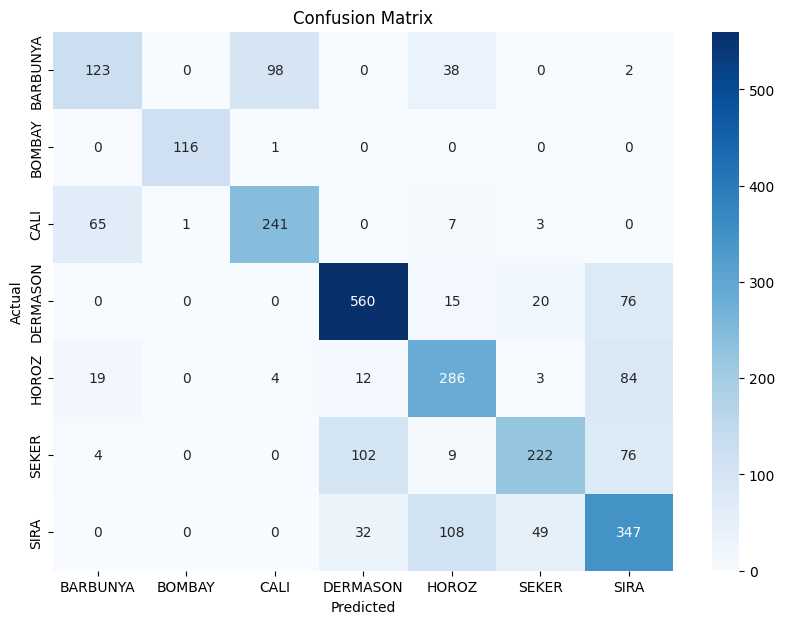

In [ ]:
# Assuming 'cm' is your confusion matrix from the previous code
plt.figure(figsize=(10, 7))  # Adjust figure size if needed
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=model.classes_, yticklabels=model.classes_)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.impute import SimpleImputer  # Import the imputer

# Separate features (X) and target variable (y)
X = dry_bean.data.features
y = dry_bean.data.targets

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create an imputer to fill missing values (e.g., with the mean)
imputer = SimpleImputer(strategy='mean')  # You can use other strategies like 'median' or 'most_frequent'

# Fit the imputer on the training data and transform both training and testing data
X_train = imputer.fit_transform(X_train)
X_test = imputer.transform(X_test) # Use the same imputer fitted on training data to avoid data leakage.


# Create a logistic regression model
model = RandomForestClassifier()

# Train the model on the training data
model.fit(X_train, y_train)

# Make predictions on the testing data
y_pred = model.predict(X_test)

# Evaluate the model's performance
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Print the confusion matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", cm)
print(classification_report(y_test, y_pred))


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


Accuracy: 0.9247153874403232
Confusion Matrix:
 [[234   0  18   0   1   1   7]
 [  0 117   0   0   0   0   0]
 [ 16   0 296   0   3   1   1]
 [  0   0   0 619   2   5  45]
 [  2   0   7   3 390   0   6]
 [  3   0   0  13   0 388   9]
 [  0   0   1  50   5   6 474]]
              precision    recall  f1-score   support

    BARBUNYA       0.92      0.90      0.91       261
      BOMBAY       1.00      1.00      1.00       117
        CALI       0.92      0.93      0.93       317
    DERMASON       0.90      0.92      0.91       671
       HOROZ       0.97      0.96      0.96       408
       SEKER       0.97      0.94      0.95       413
        SIRA       0.87      0.88      0.88       536

    accuracy                           0.92      2723
   macro avg       0.94      0.93      0.93      2723
weighted avg       0.93      0.92      0.92      2723



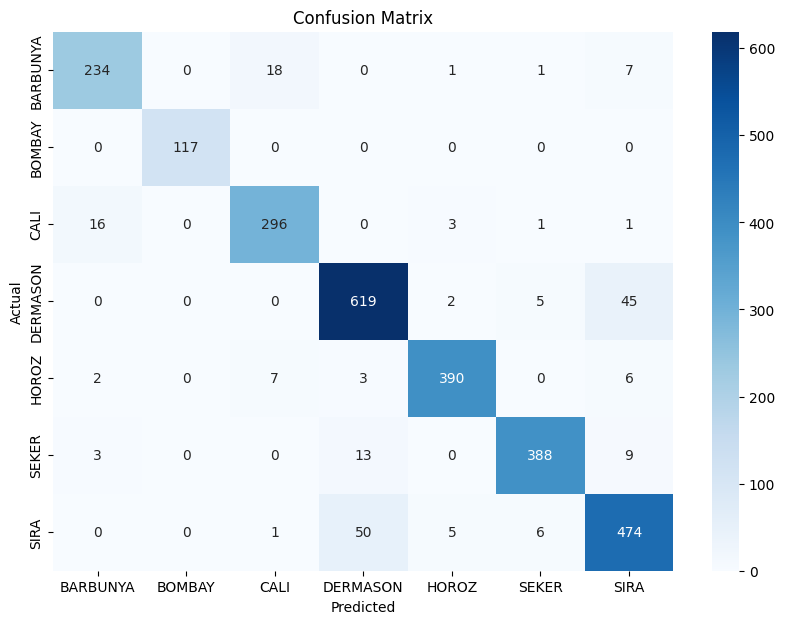

In [ ]:
plt.figure(figsize=(10, 7))  # Adjust figure size if needed
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=model.classes_, yticklabels=model.classes_)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

X = dry_bean.data.features
y = dry_bean.data.targets

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale features using StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Create an SVM classifier (using a radial basis function kernel)
svm_classifier = SVC(kernel='rbf')

# Train the SVM model
svm_classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred = svm_classifier.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

# Print classification report and confusion matrix
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Accuracy: 0.9338964377524789
              precision    recall  f1-score   support

    BARBUNYA       0.93      0.92      0.93       261
      BOMBAY       1.00      1.00      1.00       117
        CALI       0.94      0.95      0.94       317
    DERMASON       0.91      0.93      0.92       671
       HOROZ       0.98      0.96      0.97       408
       SEKER       0.97      0.95      0.96       413
        SIRA       0.88      0.90      0.89       536

    accuracy                           0.93      2723
   macro avg       0.95      0.94      0.94      2723
weighted avg       0.93      0.93      0.93      2723

[[240   0  14   0   0   1   6]
 [  0 117   0   0   0   0   0]
 [ 11   0 300   0   4   1   1]
 [  0   0   0 621   0   6  44]
 [  2   0   5   4 391   0   6]
 [  3   0   0   9   0 393   8]
 [  1   0   0  45   5   4 481]]


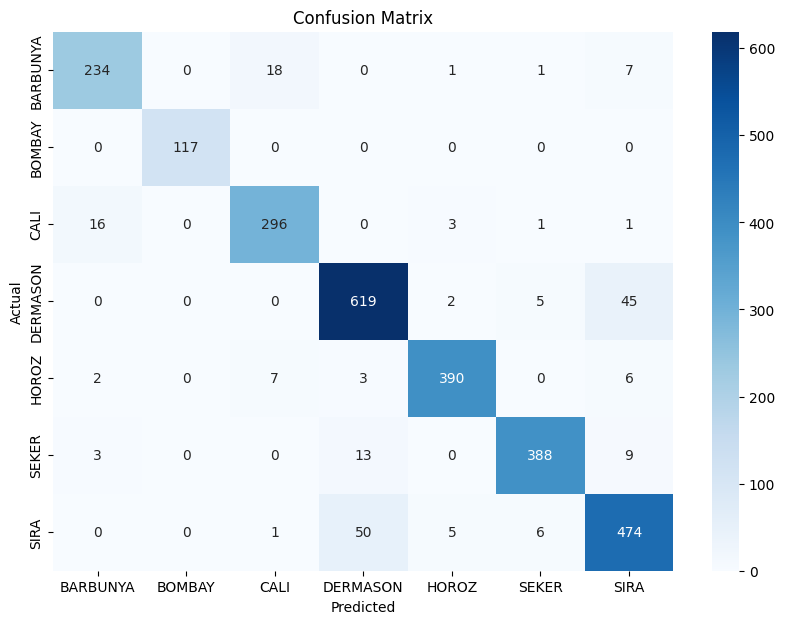

In [ ]:
plt.figure(figsize=(10, 7))  # Adjust figure size if needed
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=model.classes_, yticklabels=model.classes_)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

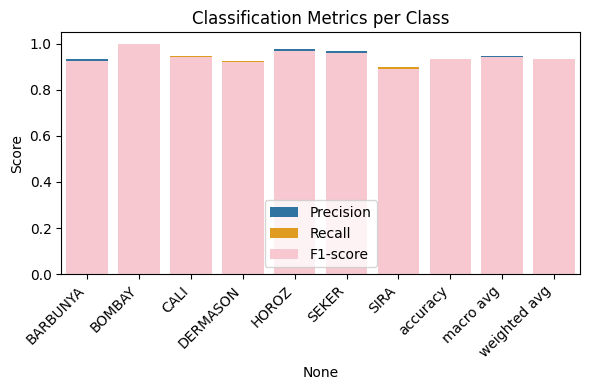

In [ ]:
from sklearn.metrics import classification_report
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# ... (Your previous code to train the model and get predictions) ...

# Generate the classification report
report = classification_report(y_test, y_pred, output_dict=True)

# Convert the report to a Pandas DataFrame
report_df = pd.DataFrame(report).transpose()

# Extract precision, recall, and F1-score
metrics = report_df[['precision', 'recall', 'f1-score']]

# Plot the metrics
plt.figure(figsize=(6, 4))
sns.barplot(x=metrics.index, y='precision', data=metrics, label='Precision')
sns.barplot(x=metrics.index, y='recall', data=metrics, label='Recall', color='orange')
sns.barplot(x=metrics.index, y='f1-score', data=metrics, label='F1-score', color='pink')
plt.xticks(rotation=45, ha='right')
plt.ylabel('Score')
plt.title('Classification Metrics per Class')
plt.legend()
plt.tight_layout()
plt.show()